In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=df[['Gender','Age','HasCrCard','IsActiveMember','Exited']]
df

,Gender,Age,HasCrCard,IsActiveMember,Exited
0,Female,42,1,1,1
1,Female,41,0,1,0
2,Female,42,1,0,1
3,Female,39,0,0,0
4,Female,43,1,1,0
...,...,...,...,...,...
9995,Male,39,1,0,0
9996,Male,35,1,1,0
9997,Female,36,0,1,1
9998,Male,42,1,0,1


In [ ]:
df.isnull().sum()

Gender            0
Age               0
HasCrCard         0
IsActiveMember    0
dtype: int64

In [ ]:
df.head()

,Gender,Age,HasCrCard,IsActiveMember,Exited
0,Female,42,1,1,1
1,Female,41,0,1,0
2,Female,42,1,0,1
3,Female,39,0,0,0
4,Female,43,1,1,0


In [ ]:
df=pd.get_dummies(df, columns = ['Gender'])

In [ ]:
df.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
from sklearn.feature_selection import chi2
X=df.drop(columns=['Exited'])
Y=df['Exited']

In [ ]:
chi_scores=chi2(X,Y)

<Axes: >

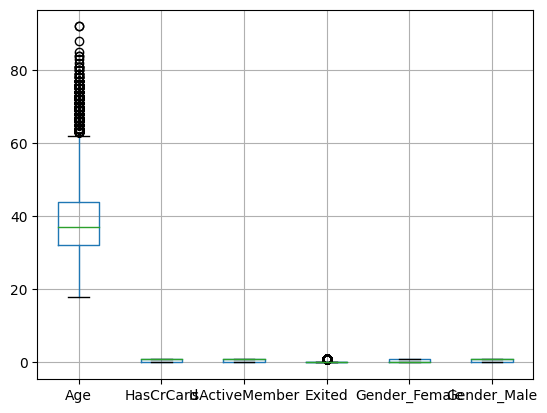

In [ ]:
df.boxplot()

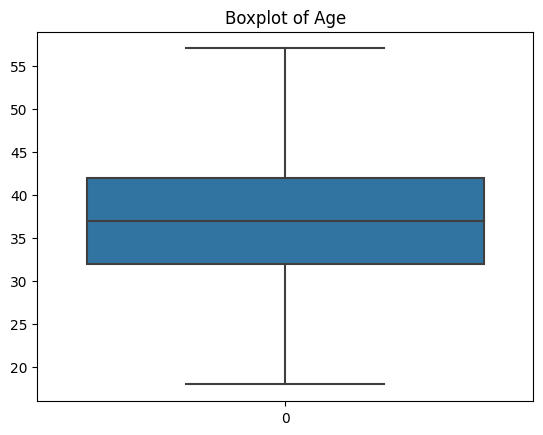

In [ ]:
for i in df['Age']:
    q1=df['Age'].quantile(0.25)
    q3=df['Age'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df['Age']= df['Age'].replace(i,np.median(df['Age']))
sns.boxplot(df['Age'])
plt.title("Boxplot of Age")
plt.show()

In [ ]:
df.head()

,Age,HasCrCard,IsActiveMember,Exited,Gender_Female,Gender_Male
0,42,1,1,1,1,0
1,41,0,1,0,1,0
2,42,1,0,1,1,0
3,39,0,0,0,1,0
4,43,1,1,0,1,0
